# developer: Mohammad mehdi Sahraei

### installing yolov5

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14469, done.
remote: Total 14469 (delta 0), reused 0 (delta 0), pack-reused 14469
Receiving objects: 100% (14469/14469), 13.47 MiB | 30.25 MiB/s, done.
Resolving deltas: 100% (9988/9988), done.


In [4]:
%cd yolov5

/content/yolov5


In [5]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.8 MB/s 


### importing and coping .txt and .jpg files 

In [16]:
import os
from random import choice
import shutil
import torch
from IPython.display import Image

In [7]:
imgs =[]
xmls =[]

train_path = '/content/yolov5/data/images/train'
val_path = '/content/yolov5/data/images/val'
source_path = '/content/drive/MyDrive/dataset'

if not os.path.exists(train_path):
  os.mkdir(train_path)
if not os.path.exists(val_path):
  os.mkdir(val_path)

train_ratio = 0.8     # 0.8 for training
val_ratio = 0.2       # 0.2 for validation

#total count of imgs
totalImgCount = len(os.listdir(source_path))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(source_path):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  592
Validation images are :  148


In [10]:
trainimagePath = '/content/yolov5/data/images/train'
trainlabelPath =  '/content/yolov5/data/labels/train'
valimagePath = '/content/yolov5/data/images/val'
vallabelPath = '/content/yolov5/data/labels/val'

if not os.path.exists(trainimagePath):
  os.mkdir(trainimagePath)
if not os.path.exists(trainlabelPath):
  os.mkdir(trainlabelPath)
if not os.path.exists(valimagePath):
  os.mkdir(valimagePath)
if not os.path.exists(vallabelPath):
  os.mkdir(vallabelPath)

for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)


#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir

    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)


In [11]:
#for moving from google drive
# shutil.copy('/content/gdrive/MyDrive/DL_projects_colab/dataset.yaml', '/content/yolov5/data/dataset.yaml')

### Training and Creating new model-(weights yolov5s.pt)

In [12]:
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache #--cache showing details 

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-225-g02b8a4c Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

### using trained model with yolov5

In [36]:
!python detect.py --source /content/drive/MyDrive/images/traffic.jpg --weights /content/yolov5/runs/train/exp/weights/last.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/last.pt'], source=/content/drive/MyDrive/images/traffic.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-225-g02b8a4c Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/images/traffic.jpg: 384x640 1 inhibitory, 1 danger, 12.3ms
Speed: 0.5ms pre-process, 12.3ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp10


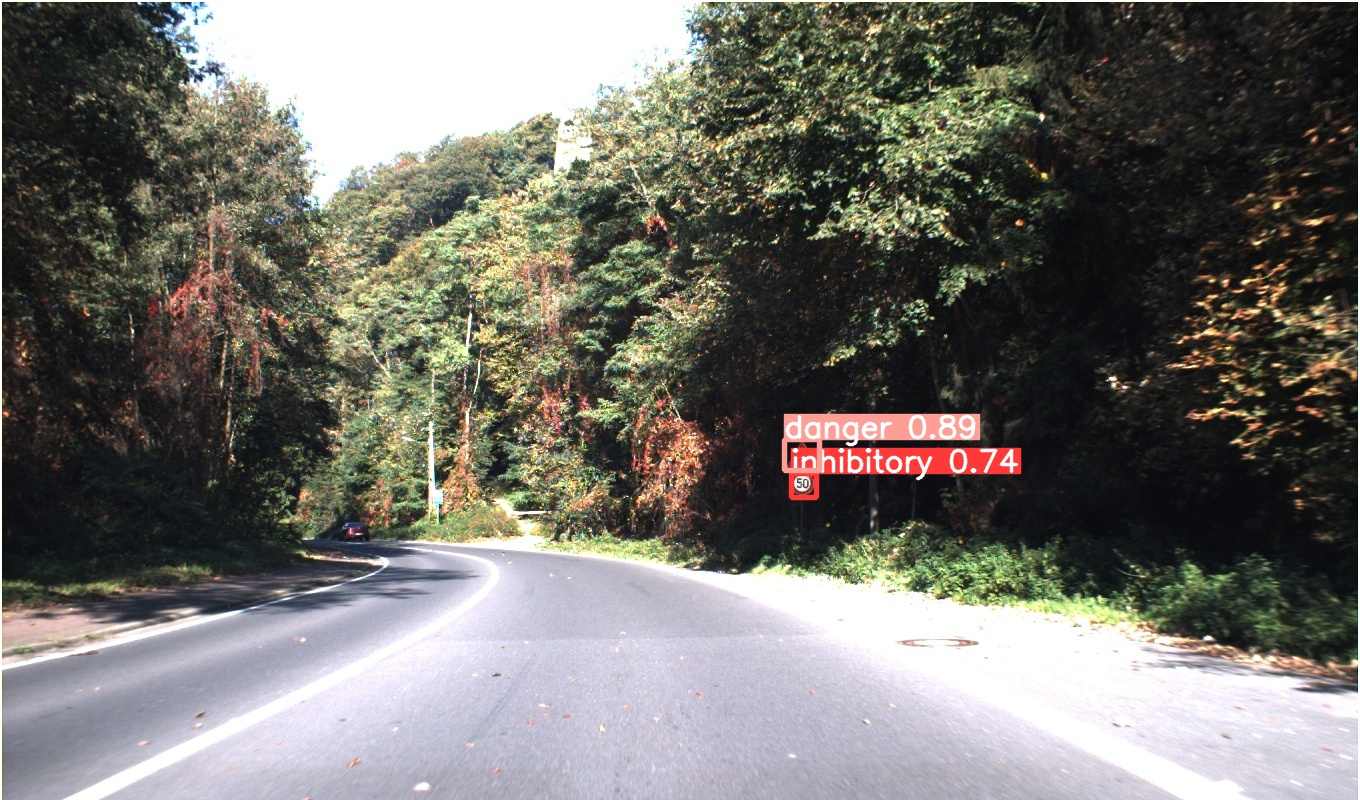

In [37]:
Image('/content/yolov5/runs/detect/exp10/traffic.jpg')

### Training and Creating new model-(weights yolov5l.pt)

In [27]:
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5l.pt --cache #--cache showing details 

train: weights=yolov5l.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-225-g02b8a4c Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

### using trained model with yolov5

In [33]:
!python detect.py --source /content/drive/MyDrive/images/traffic.jpg --weights /content/yolov5/runs/train/exp2/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/images/traffic.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-225-g02b8a4c Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/drive/MyDrive/images/traffic.jpg: 384x640 1 inhibitory, 1 danger, 35.1ms
Speed: 0.5ms pre-process, 35.1ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp9


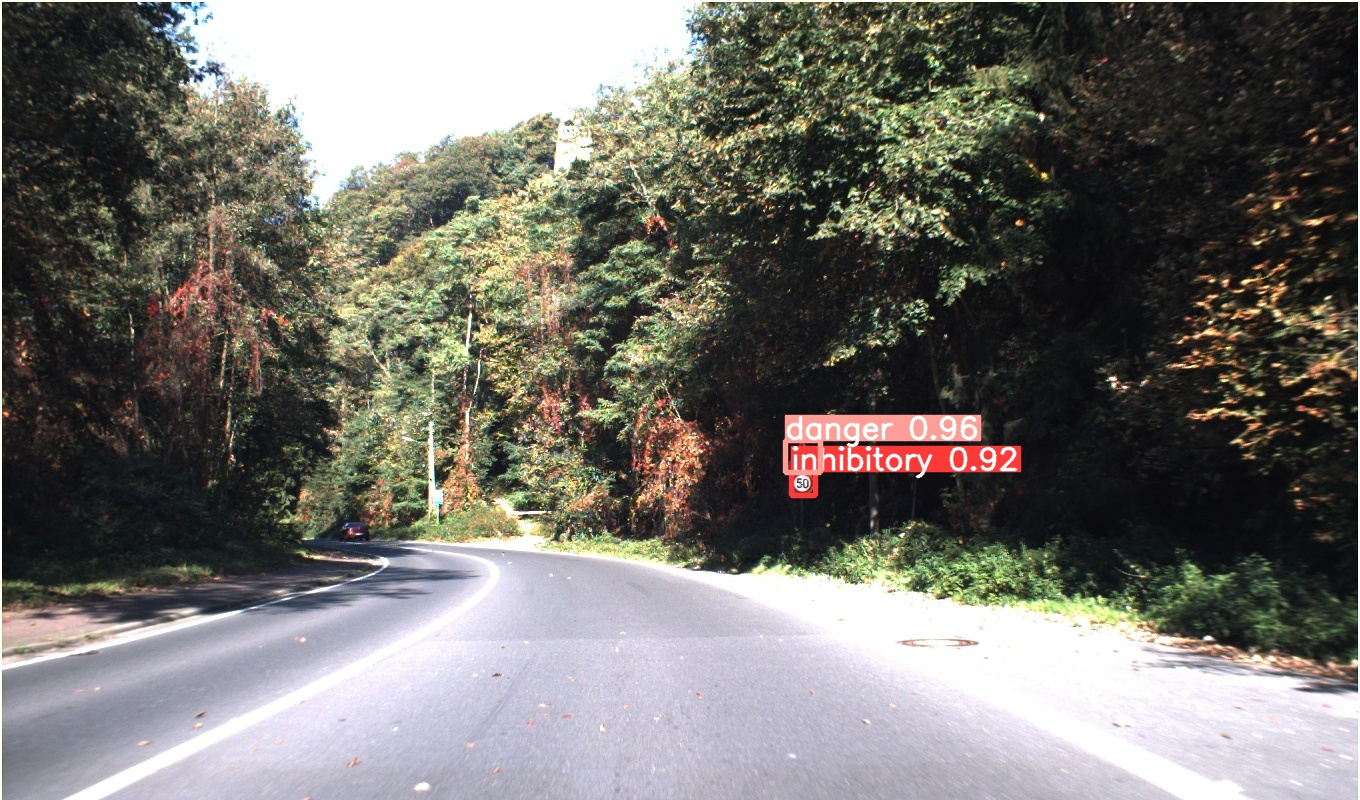

In [34]:
Image('/content/yolov5/runs/detect/exp9/traffic.jpg')

### for showing results and graph


In [39]:
# %load_ext tensorboard
# %tensorboard --logdir runs